# 4 HarvardX PH526x Using Python for Research
## Week 4 : Case Studies Part 2
### Overview
It's time to continue putting the Python skills you've been acquiring to use in three more case studies! In Week 4, we will work through three case study examples of ways to apply Python to a research question, and then you'll get a chance to practice your coding skills with an interactive homework associated with each case study.  
  
In Week 4, you will:  
- Learn how to classify whisky
- Learn how use GPS data to track the migration patterns of birds
- Learn how to analyze social networks
  
Week 4 is divided into three case studies: whisky classification, bird migration, and social network analysis. For each case study, there are introductory videos that go over the basic concepts involved with Comprehension Checks after most videos. There is also an interactive DataCamp Homework for each case study that will allow you to practice the coding techniques introduced in the videos.  
  
Some of the Comprehension Checks will require you to work through code. We encourage you to use Python to interactively test out your answers and further your learning.

### Getting started with Pandas
- Pandas Series
- Pandas DataFrames
  
Dataset - 86 malt whiskies, that are scored between 0 and 4 in 12 different taste categories.   
The scores have been aggregated from 10 different tasters.  
The taste categories describe whether the shiskies are sweet, smoky, medicinal, spicy and so on.  
  
Pandas is a python library that provides data structures and funcitons for working with structured data, primarily tabular data. Pandas basic data structure, Series (One dimensional array like) and Data Frame (two diminsional array like object).  
  
Series, 

In [1]:
import pandas as pd
x = pd.Series([6,3,8,6])
x

0    6
1    3
2    8
3    6
dtype: int64

with index

In [3]:
x = pd.Series([6,3,8,6], index = ["q","w","e","r"])
x

q    6
w    3
e    8
r    6
dtype: int64

In [4]:
x["w"]

3

In [5]:
x[["r","w"]]

r    6
w    3
dtype: int64

Creating a series from a dictionary

In [7]:
age = {"Tim":29, "Jim":31, "Pam":27, "Sam":35}
x = pd.Series(age)
x

Jim    31
Pam    27
Sam    35
Tim    29
dtype: int64

In [15]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
x

q    6
w    3
e    8
r    6
dtype: int64

In [16]:
x.index

Index(['q', 'w', 'e', 'r'], dtype='object')

In [17]:
sorted(x.index)

['e', 'q', 'r', 'w']

In [18]:
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

Series and Data Frame objects support arithmetic operations like addition. If we, for example, add two Series objects together,
the data alignment happens by index. What that means is that entries in the series that have the same index are added together in the same way we might add elements of a NumPy array.  
  
If the indices do not match, however, Pandas introduces a NAN, or not a number object, the resulting series.
This is easy to understand through an example.  

In [19]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
y = pd.Series([7,3,5,2], index=["e","q","r","t"])

In [20]:
x

q    6
w    3
e    8
r    6
dtype: int64

In [21]:
y

e    7
q    3
r    5
t    2
dtype: int64

In [22]:
x + y

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

Index is the key and vlaues are the value object in the dictionary

Creating a DataFrame from Dictionary

In [8]:
data = {"name": ["Tim", "Jim", "Pam", "Sam"], "age" : [29,31,27,35], "Zip" : ['02115', '02130','67700','00100']}

In [11]:
x = pd.DataFrame(data, columns=["name","age","Zip"])
x

,name,age,Zip
0,Tim,29,02115
1,Jim,31,02130
2,Pam,27,67700
3,Sam,35,00100


In [12]:
x["name"]

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

In [13]:
x.name

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

### Getting Started with Pandas: Question 1
What is Pandas?  
A Python library designed to query and manipulate annotated data tables  
  
### Getting Started with Pandas: Question 2
What keyword allows you to specify names to indices in a pd.Series? 
- names
- index
- key
- values
  
ANSWER: Index  
  
### Getting Started with Pandas: Question 3
In pandas, what does the reindex method do?  
- Renames the indices according to the argument or adds an additional index to the pandas Series object
- Reorders the indices of a pandas Series object according to its argument
  
ANSWER: Reorders the indices of a pandas Series object according to its argument

In [23]:
import os
os.chdir('D:\\Dev\\Python\\PythonForResearch\\videos\\4\\1 pandas\\datasets')

### Loading and Inspecting Data
- Load a CSV
- view the beginning and end
- index a DataFrame
  


In [25]:
import pandas as pd
import numpy as np

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv('regions.txt')

In [26]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [27]:
whisky.iloc[0:10]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


In [28]:
whisky.iloc[5:10, 0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [29]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In [31]:
flavors = whisky.iloc[:, 2:14]
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


### Loading and Inspecting Data: Question 1
What command reads in csv files in pandas?  
- pd.csv_read
- pd.csv
- pd.read(type="csv")
- pd.read_csv 
  
ANSWER: pd.read_csv

### Exploring Correlations
we'd like to learn whether whiskies that score high on, say, sweetness also score high on the honey attribute.
We'll be using the core function to compute correlations across the columns of a data frame.  
  
There are many different kinds of correlations, and by default, the function uses what is called Pearson correlation which estimates linear correlations in the data. In other words, if you have measured attributes for two variables, let's call them x and y the Pearson correlation coefficient between x and y approaches plus 1 as the points in the xy scatterplot approach
a straight upward line.  
  
But what is the interpretation of a correlation coefficient in this specific context? A large positive correlation coefficient indicates that the two flavor attributes in question tend to either increase or decrease together. In other words, if one of them has a high score we would expect the other, on average, also to have a high score.  


In [32]:
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

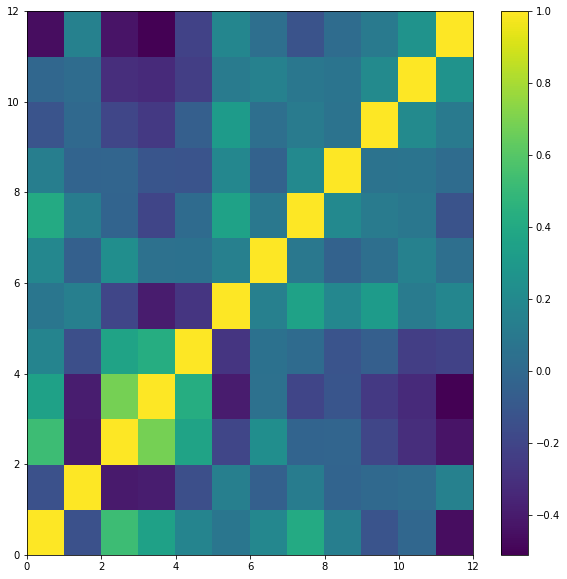

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")
plt.show()

In this case, we're getting a 12 by 12 matrix, as expected. Clearly, correlation of any dimension with itself is exactly plus 1
but other strong correlations exist too. For example, heavy body is associated with smokiness. In contrast, it seems that a floral flavor is the opposite of full body or medicinal notes.

We can also look at the correlation among whiskies across flavors. To do this, we first need to transpose our table.
Since these whiskies are made by different distilleries, we can also think of this as the correlation between different distilleries in terms of the flavor profiles of the whiskies that they produce.

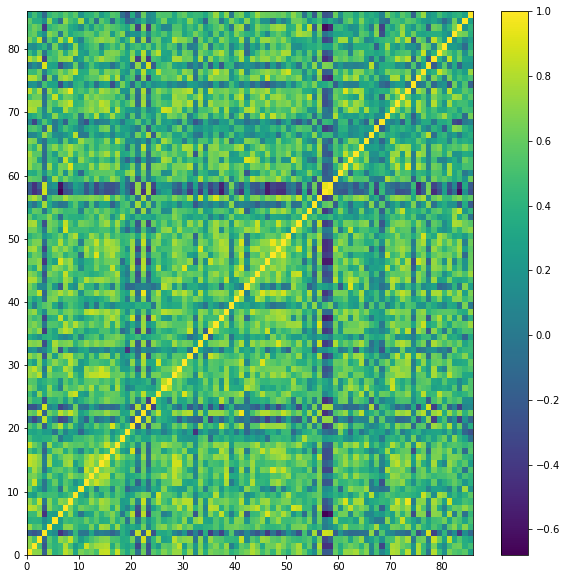

In [34]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.savefig("corr_whisky.pdf")
plt.show()

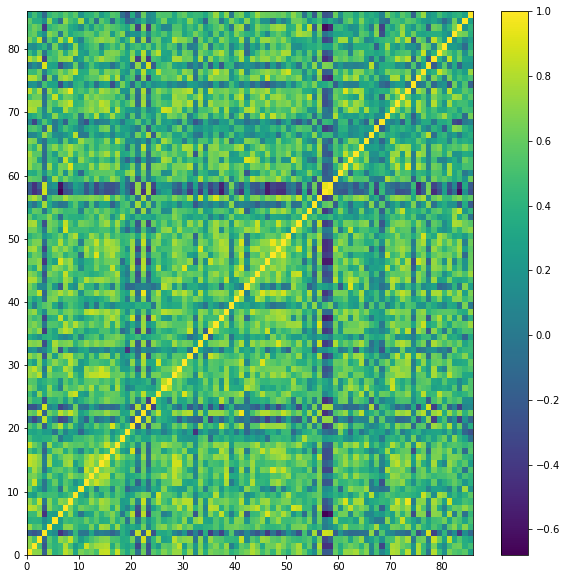

In [35]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.savefig("corr_whisky.pdf")
plt.show()

### Exploring Correlations: Question 1
How can you find a correlation matrix of a pd.Dataframe?  
- pd.correlation_matrix
- pd.corr_mat
- pd.DataFrame.corr
- pd.correlation
  
ANSWER: pd.DataFrame.corr  
  
### Exploring Correlations: Question 2
How can you plot a correlation matrix by color?  
- plt.color
- plt.pcolor
- plt.plot_corr
- plt.corr
  
ANSWER : plt.pcolor  
  
### Exploring Correlations: Question 3
What is the matplotlib.pyplot function that plots a colorbar on the side of a plot?  
- plt.plot(type="bar")
- plt.coloredbar()
- plt.bar()
- plt.colorbar()
  
ANSWER: plt.colorbar()

### Clustering Whiskies By Flavor Profile
- spectral co-clustering  
  
Next we're going to cluster whiskeys based on their flavor profiles. We'll do this using a clustering method from the scikit-learn machine learning module. The specific method we'll be using is called spectral co-clustering. One way to think about spectral co-clustering method is to consider a list of words and a list of documents, which is the context in which the method was first introduced. We can represent the problem as a graph, where on the left we have words and on the right, we have documents.  
  
The goal is to find clusters that consist of sets of words and sets of documents that often go together. An extreme example would be books written in different languages. We can also think about documents that deal with specific scientific fields,
such as biology or physics.  
  
The term co-clustering refers to the idea that we simultaneously find both clusters of words and clusters of documents.  
  
The problem as I've just presented it is still too hard to tackle, but it turns out that we can find an approximate solution to the problem. We can first represent this graph as what is called an adjacency matrix, where the rows correspond to words
and the columns correspond to documents. Any given element of this matrix represents the number of times a given word appears in the given document. We can then take this matrix, manipulate it in certain ways, and find an approximate solution to the stated clustering problem, in terms of eigenvalues and eigenvectors of this modified matrix.  
  
 the term spectral refers to the use of eigenvalues and eigenvectors of some matrix, and this is the meaning of the term spectral in spectral co-clustering. If you'd like to learn more about eigenvalues and eigenvectors, you can take any course or any textbook on matrix or linear algebra. We can think of the co-clustering technique as simultaneous clustering the rows and columns of matrix, whatever they happen to represent. In this case, we'll be using the approach to find clusters of whiskeys in our correlation matrix of whiskey flavors.  
   
This method effectively re-orders the rows and columns of the correlation matrix so that we can see blocks corresponding to groups of whiskeys more clearly. Since that whiskeys in the dataset come from six different regions, we're going to ask the clustering algorithm to find six blocks.  

In [37]:
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

The output is an array with the following dimensions-- number of row clusters times number of rows in the data matrix, the correlation matrix, in this case. The entries of the array are either true or false. Each row in this array identifies a cluster, here ranging from 0 to 5, and each column identifies a row in the correlation matrix, here ranging from 0 to 85.
If we sum all of the columns of this array, we can find out how many observations belong to each cluster.  

In [38]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

The output tells us how many whiskeys belong to a cluster 0, cluster 1, cluster 2, and so on. For example, here, 19 whiskeys belong to cluster number 2.

If instead we sum all of the rows, we can find out how many clusters belong to each observation. Because each observation belongs in just one of the six clusters, the answer should be 1 for all of them.  

In [39]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4, 3,
       4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0,
       5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2, 1, 5, 1,
       0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0])

And we can see that the output consists of 1s, as expected. Let's look at the row labels in our model. How do we interpret the output here? Observation number 0 belongs to cluster number 5, observation number 1 belongs to cluster number 2, and so on.
All of the entries in the array have to be numbers between 0 and 5 because we specified 6 clusters.

### Clustering Whiskies By Flavor Profile: Question 1
What is spectral co-clustering?  
- A method for neatly plotting clustered data
- A method for finding clusters of objects by the similarity of their attributes
- A method for finding the spectrum of a distribution
  
ANSWER: A method for finding clusters of objects by the similarity of their attributes    
  
### Clustering Whiskies By Flavor Profile: Question 2
How many clusters do we find in the whisky dataset used in Video 4.1.4?  
4,5,6,7  
ANSWER: 6

### Comparing Correlation Matrices
Let's draw the clusters as groups that we just discovered in our whisky DataFrame. Let's also rename the indices to match the sorting. We can accomplish this operation in three lines of code. We first extract the group labels from the model and append them to the whisky table. We also specify their index explicitly.

In [41]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)

In [52]:
 # whisky = whisky.ix[np.argsort(model.row_labels_)]  # ix gives an error . not sure iloc is the answer. resulting plot is difficult
whisky = whisky.iloc[np.argsort(model.row_labels_)]

In [48]:
whisky = whisky.reset_index(drop=True)

In [49]:
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())

In [50]:
correlations = np.array(correlations)

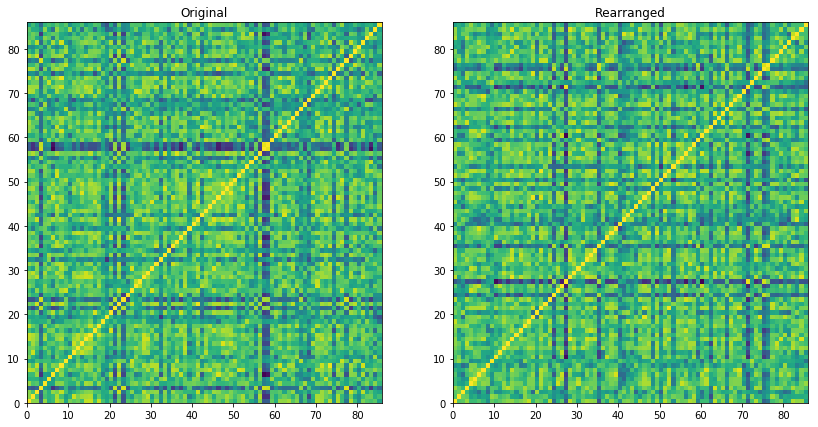

In [51]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.show()


### Comparing Correlation Matrices: Question 1
Consider the following code:  
  
<pre>
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.ix[[3,0,1,2]]
</pre>
  
What does data[0] return? Why?  
- 1: data.ix alters the order of appearance, but leaves the indices the same.
- 2: data.ix reorders the indices according to the argument.
- 3: data.ix resets the Series to the values given as the argument.
- 4: The 0th index of the data has been reordered to correspond to index 3 of the original, which is 4.
- This code contains an error.
  
ANSWER: 1: data.ix alters the order of appearance, but leaves the indices the same.    
  
    
###  Comparing Correlation Matrices: Question 2
  
Consider the following code:
  
<pre>
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.ix[[3,0,1,2]]
data = data.reset_index(drop=True)
</pre>

What does data[0] return? Why?  
- 1: data.reset_index resets the order of appearance, altering the indices to the original.
- 2: data.reset_index reorders the indices according to the data.ix argument.
- 3: data.reset_index resets the Series to the values given in the data.ix argument.
- 4: The 0th index of the data has been reordered to index 3 of the original, which is 4.
- This code contains an error.
  
ANSWER: 4: The 0th index of the data has been reordered to index 3 of the original, which is 4.

###  Exercise 1
In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.  
  
- Here we provide a basic demonstration of an interactive grid plot using Bokeh. Execute the following code and follow along with the comments. We will later adapt this code to plot the correlations among distillery flavor profiles as well as plot a geographical map of distilleries colored by region and flavor profile.
- Make sure to study this code now, as we will edit similar code in the exercises that follow.
- Once you have plotted the code, hover, click, and drag your cursor on the plot to interact with it. Additionally, explore the icons in the top-right corner of the plot for more interactive options!
  
<pre>
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!

from bokeh.models import HoverTool, ColumnDataSource
import numpy as np

# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.

plot_values = [1,2,3,4,5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)
# We are ready to make our interactive Bokeh plot!

output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="resize, hover, save")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
show(fig)

</pre>

In [60]:
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!

from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure, output_file, show
import numpy as np

# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.

plot_values = [1,2,3,4,5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)
# We are ready to make our interactive Bokeh plot!

output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="resize, hover, save")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
show(fig)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)
['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red']


### Exercise 2
In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.  
  
- Let's create the names and colors we will use to plot the correlation matrix of whisky flavors. Later, we will also use these colors to plot each distillery geographically. Create a dictionary region_colors with regions as keys and cluster_colors as values.  
  
<pre>
cluster_colors = ["red", "orange", "green", "blue", "purple", "gray"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = ## ENTER CODE HERE! ##
</pre>

In [61]:
cluster_colors = ["red", "orange", "green", "blue", "purple", "gray"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = dict(zip(regions, cluster_colors))
print(region_colors)

{'Speyside': 'red', 'Highlands': 'orange', 'Lowlands': 'green', 'Islands': 'blue', 'Campbelltown': 'purple', 'Islay': 'gray'}


### Exercise 3
In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.  
  
-correlations is a two-dimensional np.array with both rows and columns corresponding to distilleries and elements corresponding to the flavor correlation of each row/column pair. Let's define a list correlation_colors, with string values corresponding to colors to be used to plot each distillery pair. Low correlations among distillery pairs will be white, high correlations will be a distinct group color if the distilleries from the same group, and gray otherwise. Edit the code to define correlation_colors for each distillery pair to have input 'white' if their correlation is less than 0.7.

-whisky.Group is a pandas dataframe column consisting of distillery group memberships. For distillery pairs with correlation greater than 0.7, if they share the same whisky group, use the corresponding color from cluster_colors. Otherwise, the correlation_colors value for that distillery pair will be defined as 'lightgray'.
  
<pre>
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if ## ENTER CODE HERE! ##                      # if low correlation,
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if ## ENTER CODE HERE! ##                  # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.
</pre>

In [62]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i, j] < .70: ## ENTER CODE HERE! ##                      # if low correlation,
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if whisky.Group[i] == whisky.Group[j]:## ENTER CODE HERE! ##                  # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.

### Exercise 4
In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.  
  
- We will edit the following code to make an interactive grid of the correlations among distillery pairs using correlation_colors and correlations. correlation_colors is a list of each distillery pair. To convert correlations from a np.array to a list, we will use the flatten method. Define the color of each rectangle in the grid using to correlation_colors.
- Define the alpha (transparency) values using correlations.flatten().
- Define correlations and using correlations.flatten(). When the cursor hovers over a rectangle, this will output the distillery pair, show both distilleries as well as their correlation coefficient.  
  
<pre>
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": ## ENTER CODE HERE! ##,
        "alphas": ## ENTER CODE HERE! ##,
        "correlations": ## ENTER CODE HERE! ##,
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", tools="resize,hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='alphas')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)
</pre>

In [63]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors, ## ENTER CODE HERE! ##,
        "alphas": correlations.flatten(), ## ENTER CODE HERE! ##,
        "correlations": correlations.flatten(), ## ENTER CODE HERE! ##,
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", tools="resize,hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='alphas')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

### Exercise 5
In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.  
  
- Next, we provide an example of plotting points geographically. Run the following code, to be adapted in the next section. Compare this code to that used in plotting the distillery correlations.
  
<pre>
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ["red", "blue", "green"]

output_file("Spatial_Example.html", title="Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title",
    x_axis_location = "above", tools="resize, hover, save")
fig.plot_width  = 300
fig.plot_height = 380
fig.circle("x", "y", 10, 10, size=10, source=location_source,
     color='colors', line_color = None)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)
</pre>

In [70]:
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ["red", "blue", "green"]

output_file("Spatial_Example.html", title="Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title", x_axis_location = "above", tools="resize, hover, save")
fig.plot_width  = 300
fig.plot_height = 380
# fig.circle("x", "y", 10, 10, size=10, source=location_source, color='colors', line_color = None)
fig.circle("x", "y", size=10, source=location_source, color='colors', line_color = None)  # 10, 10 removed

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)

### Exercise 6
In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.  
  
- Adapt the given code from the beginning to show(fig) in order to define a function location_plot(title, colors). This function takes a string title and a list of colors corresponding to each distillery and outputs a Bokeh plot of each distillery by latitude and longitude. As the cursor hovers over each point, it displays the distillery name, latitude, and longitude.
- whisky.Region is a pandas column containing the regional group membership for each distillery. Make a list consisting of the value of region_colors for each distillery, and store this list as region_cols.
- Use location_plot to plot each distillery, colored by its regional grouping.
  
<pre>
# edit this to make the function `location_plot`.

output_file(title+".html")
location_source = ColumnDataSource(
    data={
        "x": whisky[" Latitude"],
        "y": whisky[" Longitude"],
        "colors": colors,
        "regions": whisky.Region,
        "distilleries": whisky.Distillery
    }
)

fig = figure(title = title,
    x_axis_location = "above", tools="resize, hover, save")
fig.plot_width  = 400
fig.plot_height = 500
fig.circle("x", "y", 10, 10, size=9, source=location_source,
     color='colors', line_color = None)
fig.xaxis.major_label_orientation = np.pi / 3
hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Distillery": "@distilleries",
    "Location": "(@x, @y)"
}
show(fig)

region_cols = ## ENTER CODE HERE! ##
location_plot("Whisky Locations and Regions", region_cols)

</pre>

In [72]:
def location_plot(title, colors):
    output_file(title + ".html")
    location_source = ColumnDataSource(
        data={
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )

    fig = figure(title=title,
                 x_axis_location="above", tools="resize, hover, save")
    fig.plot_width = 400
    fig.plot_height = 500
    # fig.circle("x", "y", 10, 10, size=9, source=location_source, color='colors', line_color=None)
    fig.circle("x", "y", size=9, source=location_source, color='colors', line_color=None) # 10, 10 removed
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type=HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)


region_cols = [region_colors[i] for i in list(whisky["Region"])]
location_plot("Whisky Locations and Regions", region_cols)


### Exercise 7
In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple and interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.  
  
- Use list comprehensions to create the list region_cols consisting of the color in region_colors that corresponds to each whisky in whisky.Region.
- Similarly, create a list classification_cols consisting of the color in cluster_colors that corresponds to each cluster membership in whisky.Group.
- location_plot remains stored from the previous exercise. Use it to create two interactive plots of distilleries, one colored by defined region called region_cols and the other with colors defined by coclustering designation called classification_cols. How well do the coclustering groupings match the regional groupings?
  
<pre>
region_cols = ## ENTER CODE HERE! ##
classification_cols = ## ENTER CODE HERE! ##

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)
</pre>

In [73]:
region_cols = [region_colors[i] for i in list(whisky.Region)] ## ENTER CODE HERE! ##
classification_cols = [cluster_colors[i] for i in list(whisky.Group)] ## ENTER CODE HERE! ##

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)

Great work! We see that there is not very much overlap between the regional classifications and the coclustering classifications. This means that regional classifications are not a very good guide to Scotch whisky flavor profiles. This concludes the case study. You can return to the course through this link: https://courses.edx.org/courses/course-v1:HarvardX+PH526x+3T2016

## Case Study 5: Bird Migration
### Introduction to GPS Tracking of Birds
Learn how GPS data can be used to track bird migration patterns